# Etudes des valeurs foncières Française
### Liens: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

Framework: Scikit Learn

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Chargement du fichiers des valeurs foncières de 2018

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y') # 03/01/2018
df = pd.read_csv('valeursfoncieres-2018.txt', sep='|', decimal=",", parse_dates=['Date mutation'], date_parser=dateparse)

/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Analyse des données manquantes

In [36]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(),
                'Manquant %':round((df.isnull().sum()/len(df))*100, 2),
                'Type':df.dtypes
               }
    return pd.DataFrame(analysis)

In [37]:
missing_values_assessment(df).sort_values('Manquant %', ascending=False)

Nombre d'observations: 2,927,795
Nombre de valeurs: 102,472,825
Valeurs manquantes: 49,336,267
Qualité des données: 51.85%
Type de données:
 object            16
float64           14
int64              4
datetime64[ns]     1
dtype: int64%


,Manquant,Manquant %,Type
surface_carrez_du_5eme_lot,2927129,99.98,float64
surface_carrez_du_4eme_lot,2926152,99.94,float64
5eme_lot,2922697,99.83,object
surface_carrez_du_3eme_lot,2921553,99.79,float64
no_volume,2919541,99.72,object
4eme_lot,2916847,99.63,float64
3eme_lot,2896451,98.93,object
surface_carrez_du_2eme_lot,2864051,97.82,float64
b/t/q,2806805,95.87,object
prefixe_de_section,2796444,95.51,float64


In [83]:
df.select_dtypes(exclude=['object']).describe()

,no_disposition,valeur_fonciere,no_voie,code_postal,code_commune,prefixe_de_section,no_plan,surface_carrez_du_1er_lot,surface_carrez_du_2eme_lot,surface_carrez_du_3eme_lot,4eme_lot,surface_carrez_du_4eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain
count,2.927795e+06,2.927795e+06,1.667219e+06,2.897798e+06,2.927795e+06,131351.000000,2.927795e+06,261717.000000,63744.000000,6242.000000,10948.000000,1643.000000,666.000000,2.927795e+06,1.499676e+06,1.497614e+06,1.497614e+06,1.989776e+06
mean,1.182682e+00,5.596755e+05,7.602432e+02,5.026230e+04,2.102814e+02,490.171434,4.137658e+02,62.801653,63.910438,86.755734,154.504932,121.791753,126.594745,4.029353e-01,1.972893e+00,9.194560e+01,2.481828e+00,2.962688e+03
std,4.236333e+00,9.717494e+06,2.089056e+03,2.724979e+04,1.680761e+02,323.399738,5.723709e+02,131.840463,54.737952,248.556270,2304.663516,374.435665,427.558724,8.385999e-01,9.571763e-01,7.420706e+02,2.108221e+00,1.421613e+04
min,1.000000e+00,1.500000e-01,1.000000e+00,1.000000e+03,1.000000e+00,1.000000,1.000000e+00,0.100000,0.100000,0.400000,2.000000,0.400000,0.600000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,5.497575e+04,9.000000e+00,2.962000e+04,7.600000e+01,180.000000,8.800000e+01,33.690000,42.960000,39.835000,7.000000,37.100000,31.400000,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.310000e+02
50%,1.000000e+00,1.400000e+05,2.600000e+01,4.900000e+04,1.730000e+02,418.000000,2.270000e+02,53.300000,61.080000,62.100000,23.000000,67.320000,60.750000,0.000000e+00,2.000000e+00,6.300000e+01,3.000000e+00,6.080000e+02
75%,1.000000e+00,2.496500e+05,9.900000e+01,7.501500e+04,3.000000e+02,831.000000,5.100000e+02,73.400000,76.510000,88.720000,66.000000,107.625000,112.737500,1.000000e+00,3.000000e+00,9.600000e+01,4.000000e+00,1.815000e+03
max,2.600000e+02,1.256966e+09,9.999000e+03,9.749000e+04,9.090000e+02,950.000000,9.721000e+03,9999.000000,8284.000000,8284.000000,161313.000000,4331.400000,8188.000000,3.300000e+02,4.000000e+00,2.778140e+05,9.000000e+01,4.625500e+06


#### Renomme les colonnes

In [5]:
import unidecode

columns = {}
for index, column_name in enumerate(df.columns):
    columns[column_name] = unidecode.unidecode(column_name.replace(' ','_').replace('\'','_').lower())
df.rename(columns=columns, inplace=True)

#### Supression des colonnes sans données

In [6]:
# Drop NaN columns
initial_length = len(df.columns)
df.dropna(how='all', axis=1, inplace=True)
print("Suppression de {} colonnes sans données".format(initial_length-len(df.columns)))

Suppression de 8 colonnes sans données


#### Suppression des lignes en double

In [7]:
# Drop duplicates
initial_length = len(df)
df.drop_duplicates(inplace=True)
print("Suppression des doublons: {}".format(initial_length-len(df)))

Suppression des doublons: 108687


In [8]:
# Suppression des lignes où il n'y a pas de 'valeurs foncières'
indexNames = df[df.valeur_fonciere.isnull()].index
df.drop(indexNames, inplace=True)

### Supprime les données aberrantes

In [9]:
def outliers(df, min_qtl, max_qtl):
    q_inf = df.valeur_fonciere.quantile(min_qtl)
    q_sup = df.valeur_fonciere.quantile(max_qtl)
    df_no_out = df[(df.valeur_fonciere>q_inf) &
                  (df.valeur_fonciere<q_sup)
                  ]
    return df_no_out

##### Découpe les données entre 'Appartement' et 'Maison'

In [41]:
# Maison
maison_df = df[df.code_type_local==1]
print('Nb de maison: {}'.format(len(maison_df)))
# Appartement
appart_df = df[df.code_type_local==2]
print('Nb d\'appartement: {}'.format(len(appart_df)))

Nb de maison: 598446
Nb d'appartement: 452858


####  Recherche de données aberrantes

In [42]:
# Suppression des valeurs foncières avec un quantile inférieur à 5% et supérieur à 95%
appart_no_out = outliers(appart_df,.05,.95)
print('Appartement:\n{}'.format(appart_no_out.valeur_fonciere.describe().apply(lambda x: format(x, 'f'))))

maison_no_out = outliers(maison_df,.05,.95)
print('\nMaison:\n{}'.format(maison_no_out.valeur_fonciere.describe().apply(lambda x: format(x, 'f'))))

Appartement:
count    406630.000000
mean     209248.563103
std      160611.637993
min       43002.000000
25%      103000.000000
50%      160000.000000
75%      254789.750000
max      999990.000000
Name: valeur_fonciere, dtype: object

Maison:
count    538258.000000
mean     200684.701320
std      112998.432566
min       40001.000000
25%      118000.000000
50%      175000.000000
75%      260000.000000
max      591970.000000
Name: valeur_fonciere, dtype: object


On a gardé les quantiles entre 5% et 95% pour éviter les données aberrantes (ex.: un appartement à 1 Milliard)

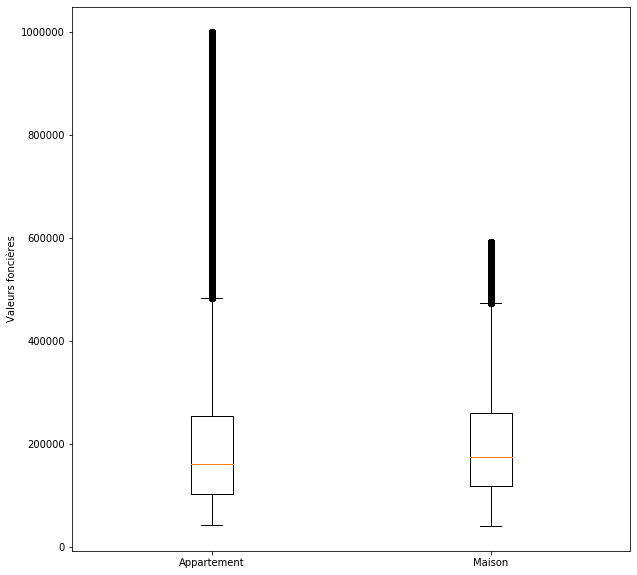

In [43]:
plt.figure(figsize=(10,10))
plt.boxplot([appart_no_out.valeur_fonciere, maison_no_out.valeur_fonciere])
plt.ylabel('Valeurs foncières')
plt.xticks([1,2],['Appartement','Maison'])
plt.show();

#### Calcul du prix au m2

Pour continuer la recherche de données aberrantes sur le prix et la surface, on créé un nouvel attribut du prix au mètre carré.

In [44]:
appart_no_out['total_m2'] = np.maximum((appart_no_out.surface_carrez_du_1er_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_2eme_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_3eme_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_4eme_lot.fillna(0) + \
    appart_no_out.surface_carrez_du_5eme_lot.fillna(0)),appart_no_out.surface_reelle_bati)

appart_no_out = appart_no_out[appart_no_out.total_m2>0]
appart_no_out['prix_m2'] = round(appart_no_out.valeur_fonciere/appart_no_out.total_m2,2)

/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
appart_no_out.prix_m2.describe().apply(lambda x: format(x, 'f'))

count    406612.000000
mean       4258.237239
std        5386.618498
min           7.250000
25%        1984.850000
50%        3048.130000
75%        4835.857500
max      690000.000000
Name: prix_m2, dtype: object

On voit qu'il y a un appartement avec un prix à 690.000€ le m2 qui est de toute évidence une donnée aberrante.
Donc on garde les quantiles entre 5% et 95%

In [46]:
q_inf = appart_no_out.prix_m2.quantile(.05)
q_sup = appart_no_out.prix_m2.quantile(.95)
appart_no_out = appart_no_out[(appart_no_out.prix_m2>q_inf) & (appart_no_out.prix_m2<q_sup) ]
print('Appartement:\n{}'.format(appart_no_out.prix_m2.describe().apply(lambda x: format(x, 'f'))))

Appartement:
count    365905.000000
mean       3669.641465
std        2174.811634
min        1041.700000
25%        2086.490000
50%        3048.390000
75%        4543.480000
max       10759.490000
Name: prix_m2, dtype: object


Maintenant le prix au m2 maximum est de 10759€. Le minimum est de 1041€. Nous n'avons pas gardé des valeurs plus extrêmes car nous avons peu de biens pour en déduire un prix.

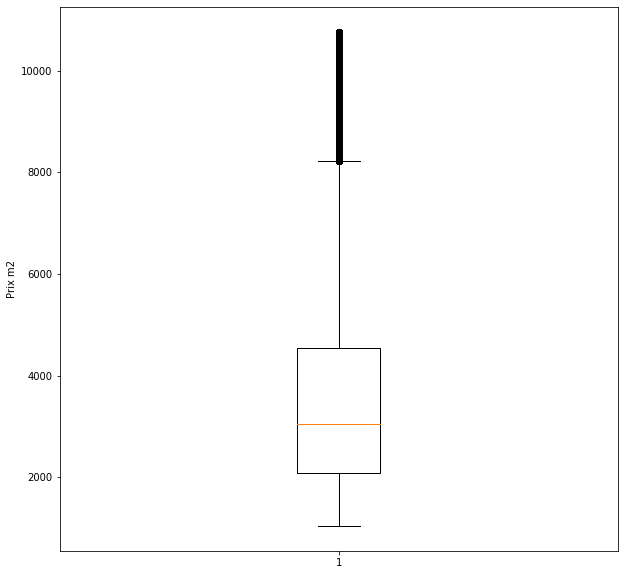

In [47]:
plt.figure(figsize=(10,10))
plt.boxplot(appart_no_out.prix_m2)
plt.ylabel('Prix m2')
plt.show();

#### Nombre de pièces principales

Suppression des biens avec des nombres de pièces hors-norme (ex:63)

In [48]:
#q_inf = appart_no_out.nombre_pieces_principales.quantile(.05)
q_sup = appart_no_out.nombre_pieces_principales.quantile(.999)
appart_no_out = appart_no_out[appart_no_out.nombre_pieces_principales<q_sup]
print('Appartement:\n{}'.format(appart_no_out.nombre_pieces_principales.describe().apply(lambda x: format(x, 'f'))))

Appartement:
count    365199.000000
mean          2.597011
std           1.094714
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           6.000000
Name: nombre_pieces_principales, dtype: object


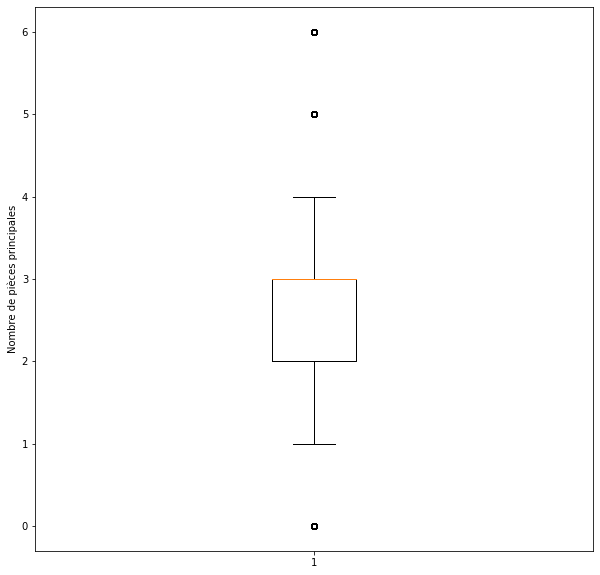

In [49]:
plt.figure(figsize=(10,10))
plt.boxplot(appart_no_out.nombre_pieces_principales)
plt.ylabel('Nombre de pièces principales')
plt.show();

In [50]:
pd.set_option('display.max_rows', 500)
appart_no_out[[ 
          'type_local',
          'code_voie',
          'no_voie',
          'type_de_voie',
          'voie',
          'code_postal',
          'commune',
          'nombre_de_lots',
          'nombre_pieces_principales',
#          'surface_carrez_du_1er_lot',
#          '1er_lot',
#          'surface_carrez_du_2eme_lot',
#          '2eme_lot',
#          'surface_carrez_du_3eme_lot',
#          '3eme_lot',
#          'surface_carrez_du_4eme_lot',
#          'surface_carrez_du_5eme_lot',
#         'surface_reelle_bati',
         'total_m2',
         'prix_m2',
         'valeur_fonciere',
          ]].sort_values('prix_m2', ascending=False).head(10)

,type_local,code_voie,no_voie,type_de_voie,voie,code_postal,commune,nombre_de_lots,nombre_pieces_principales,total_m2,prix_m2,valeur_fonciere
3010395,Appartement,3598,7.0,CRS,DE LA FERME ST LAZARE,75010.0,PARIS 10,1,1.0,21.92,10759.49,235848.0
3012704,Appartement,8289,83.0,RUE,DE ROCHECHOUART,75009.0,PARIS 09,1,2.0,41.36,10759.19,445000.0
3046236,Appartement,8055,8.0,RUE,RAVIGNAN,75018.0,PARIS 18,2,2.0,36.25,10758.62,390000.0
3007221,Appartement,6369,22.0,RUE,MILTON,75009.0,PARIS 09,2,3.0,58.00,10758.62,624000.0
3038249,Appartement,0045,23.0,RUE,DES ACACIAS,75017.0,PARIS 17,2,1.0,29.00,10758.62,312000.0
2922395,Appartement,8180,5.0,RUE,DE ROSNY,94120.0,FONTENAY-SOUS-BOIS,0,3.0,77.00,10758.44,828400.0
2804168,Appartement,0712,31.0,RUE,DE BILLANCOURT,92100.0,BOULOGNE-BILLANCOURT,2,1.0,19.52,10758.20,210000.0
3011204,Appartement,0792,27.0,RUE,BEAUREPAIRE,75010.0,PARIS 10,2,3.0,55.00,10758.18,591700.0
3022032,Appartement,2047,12.0,RUE,DES CINQ DIAMANTS,75013.0,PARIS 13,1,1.0,17.02,10757.93,183100.0
3015096,Appartement,7401,32.0,BD,DE PICPUS,75012.0,PARIS 12,2,1.0,26.00,10757.69,279700.0


## Régression linéaire avec un seul attribut pour les appartements

Nous utilisons un modèle de régression linaire pour prédire le prix d'un apparement. Le seul attribut utilisé est la surface totale

In [51]:
y = appart_no_out.valeur_fonciere
X = appart_no_out.total_m2

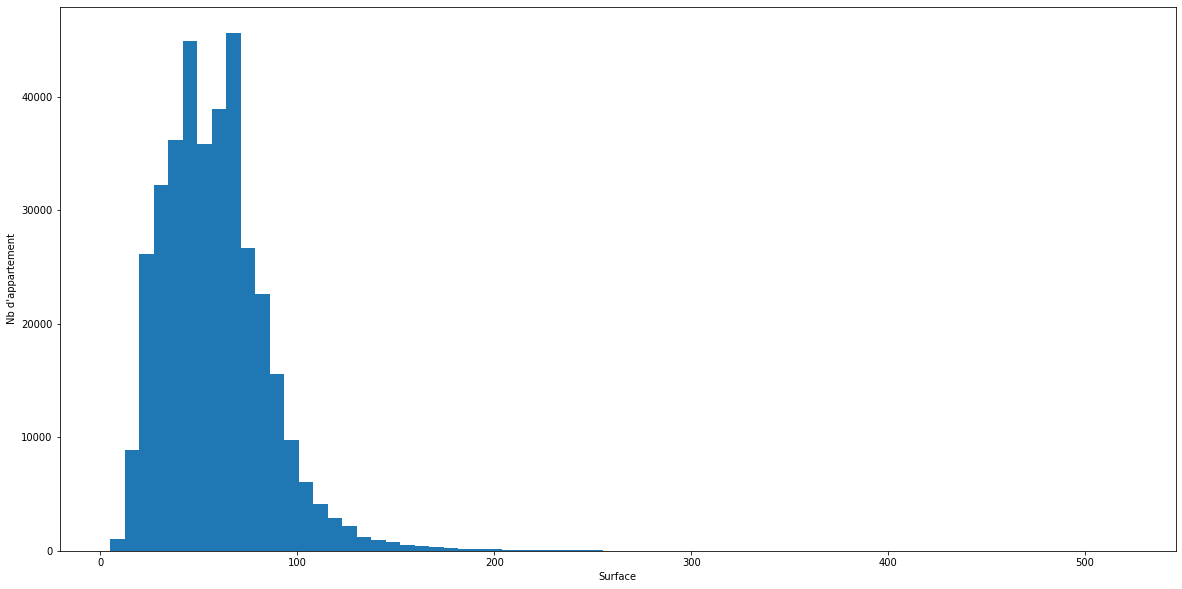

In [52]:
plt.figure(figsize=(20,10))
plt.hist(X, bins=70)
plt.ylabel('Nb d\'appartement')
plt.xlabel('Surface')
plt.show();

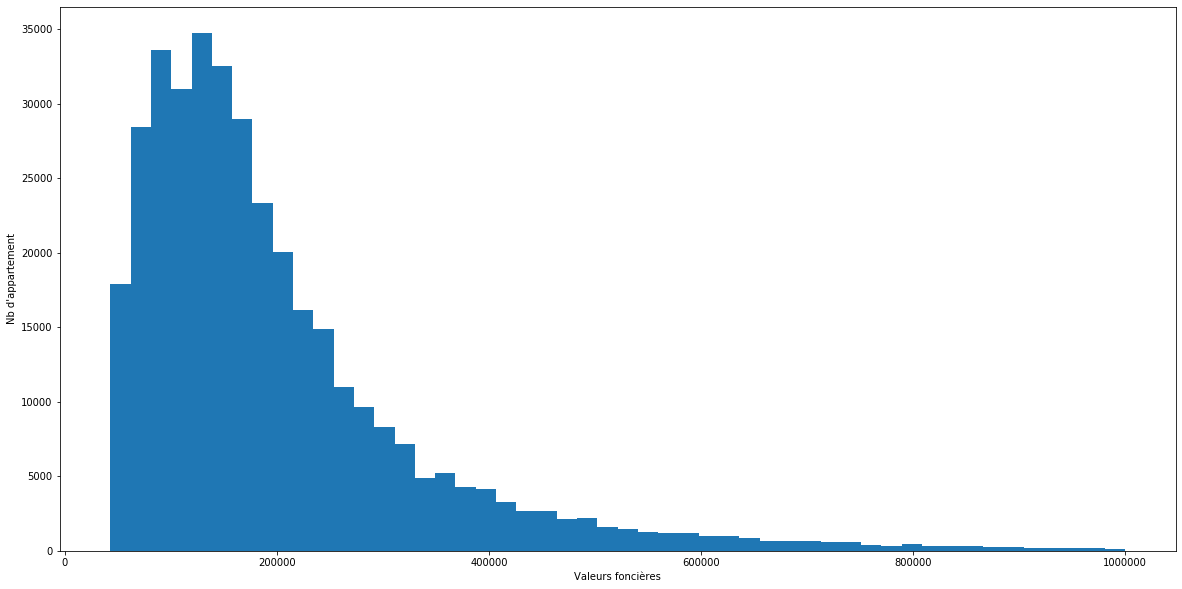

In [53]:
plt.figure(figsize=(20,10))
plt.hist(y, bins=50)
plt.ylabel('Nb d\'appartement')
plt.xlabel('Valeurs foncières')
plt.ticklabel_format(style='plain')
plt.show();

In [54]:
y_reg = y.values.reshape(-1, 1)
X_reg = X.values.reshape(-1, 1)

In [55]:
reg = LinearRegression()
reg.fit(X_reg, y_reg)
prediction_space = np.linspace(min(X_reg), max(X_reg)).reshape(-1, 1)

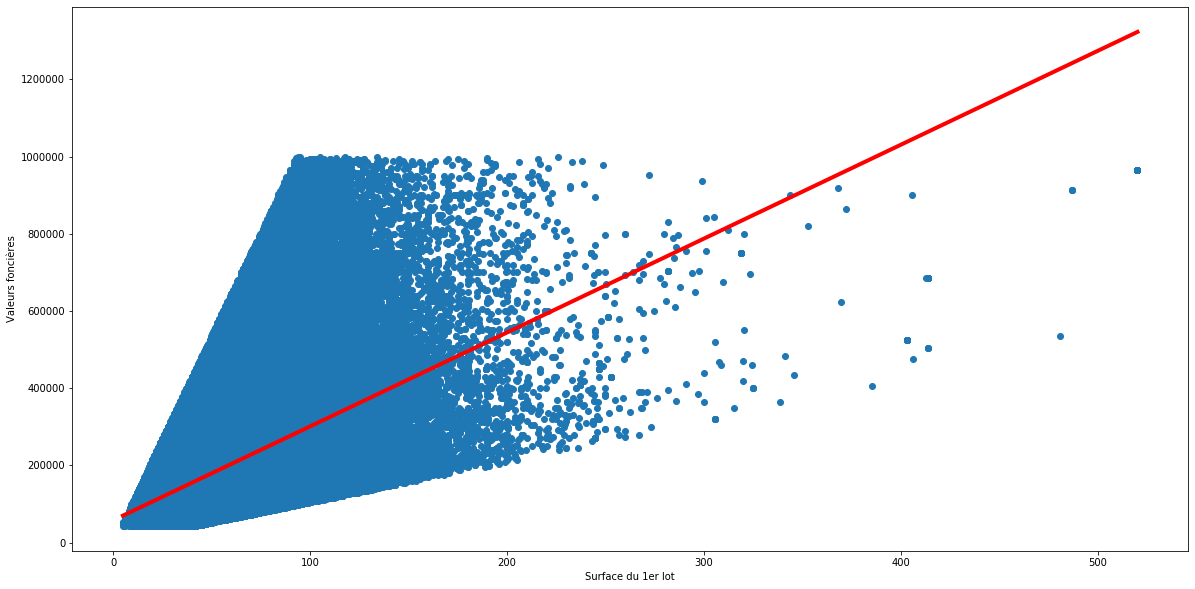

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(X_reg, y_reg)
plt.plot(prediction_space, reg.predict(prediction_space), color='red', linewidth=4)
plt.ylabel('Valeurs foncières')
plt.xlabel('Surface du 1er lot')
plt.ticklabel_format(style='plain')
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y.values.reshape(-1,1), test_size=0.33, random_state=42)
reg.score(X_test, y_test)

0.22221950250560318

En utilisant un seul attribut avec un modèle de regression linéaire, nous arrivons un score de prédiction relativement faible de 22.22%

## Régression linéaire avec plusieurs attributs pour les appartements

#### Rajout e plusieurs attributs qui peuvent influer sur le prix de l'appartement.

In [126]:
appart_reglin = appart_no_out[[
    'valeur_fonciere',
    #'total_m2',
    'nombre_pieces_principales',
    'code_commune',
    'code_departement',
    'nombre_de_lots',
    'surface_carrez_du_1er_lot',
    'surface_carrez_du_2eme_lot',
    'surface_carrez_du_3eme_lot',
    'surface_carrez_du_4eme_lot',
    'surface_carrez_du_5eme_lot',
    'surface_reelle_bati'
    ]]

appart_reglin.surface_carrez_du_1er_lot.fillna(0, inplace=True)
appart_reglin.surface_carrez_du_2eme_lot.fillna(0, inplace=True)
appart_reglin.surface_carrez_du_3eme_lot.fillna(0, inplace=True)
appart_reglin.surface_carrez_du_4eme_lot.fillna(0, inplace=True)
appart_reglin.surface_carrez_du_5eme_lot.fillna(0, inplace=True)
appart_reglin.surface_reelle_bati.fillna(0, inplace=True)
#appart_reglin['Surface terrain'].fillna(0, inplace=True)

/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [127]:
appart_reglin.code_departement.replace({'2A':201,'2B':202, '29':29}, inplace=True)
appart_reglin.code_departement.astype('int32')
appart_reglin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365199 entries, 0 to 3059532
Data columns (total 11 columns):
valeur_fonciere               365199 non-null float64
nombre_pieces_principales     365199 non-null float64
code_commune                  365199 non-null int64
code_departement              365199 non-null int64
nombre_de_lots                365199 non-null int64
surface_carrez_du_1er_lot     365199 non-null float64
surface_carrez_du_2eme_lot    365199 non-null float64
surface_carrez_du_3eme_lot    365199 non-null float64
surface_carrez_du_4eme_lot    365199 non-null float64
surface_carrez_du_5eme_lot    365199 non-null float64
surface_reelle_bati           365199 non-null float64
dtypes: float64(8), int64(3)
memory usage: 33.4 MB


/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [128]:
X = appart_reglin.drop('valeur_fonciere',axis=1)
y = appart_reglin.valeur_fonciere

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

(244683, 10)
(244683,)


In [130]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
#y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.22953800888398235

#### Cross-validation

In [105]:
from sklearn.model_selection import cross_val_score
cv_reg = LinearRegression()
cv_results = cross_val_score(cv_reg, X.values, y.values, cv=len(X.columns))
print(cv_results)

[ 0.3319914   0.12423034  0.24383077 -0.06007977 -0.00956366  0.17288346
  0.2504647   0.19620995  0.14109968 -0.83297905]


In [106]:
np.mean(cv_results)

0.05580878206496519

#### Régression linéaire avec Lasso

In [110]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train,y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

#### Filtre sur l'importance des features

In [111]:
lasso_df = pd.DataFrame(np.array([lasso.coef_]), columns=X.columns)

for col in lasso_df.columns:
    if lasso_df[col].iloc[0]<1000:
        lasso_df.drop(col, axis=1, inplace=True)

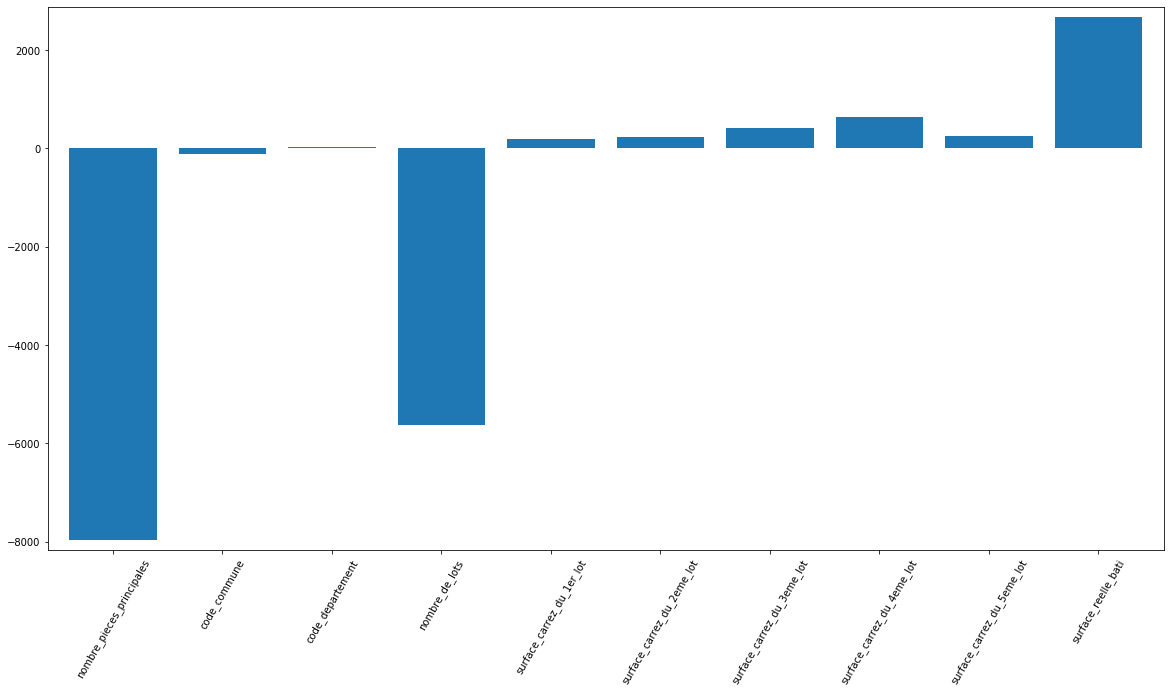

In [112]:
col_rang = range(len(lasso_df.columns))

plt.figure(figsize=(20,10))
plt.bar(col_rang, lasso_df.iloc[0])
plt.xticks(col_rang, lasso_df.columns, rotation=60)
plt.margins(0.02)
plt.show()